In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
teams = ["Digilog","AICU","IUACAAS","Automatoes","TheAutomators"]
df_raw = []
df_teams  = []
i = 0
for i in range(len(teams)):
    df_tmp = pd.read_csv("../datasets/{}/GreenhouseClimate.csv".format(teams[i]))
    df_tmp=df_tmp.astype("float32")
    df_tmp=df_tmp.fillna(0)
    df_raw.append(df_tmp)

/home/kaypee/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_raw[0].columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip'],
      dtype='object')

In [5]:
# df_raw[1][['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
#        'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
#        'Tot_PAR_Lamps', 'VentLee', 'Ventwind']].plot(figsize=(20,20))

In [6]:
setpoint_columns = ["assim_sp","co2_sp","dx_sp","int_blue_sp","int_farred_sp", \
        "int_red_sp","int_white_sp","scr_blck_sp","scr_enrg_sp","t_grow_min_sp",\
        "t_heat_sp","t_rail_min_sp","t_vent_sp","water_sup_intervals_sp_min",\
        "window_pos_lee_sp"]


In [7]:
# creating actions dataframe for each teams 
df_actions = []
for df_team in df_raw:
    df_actions.append(df_team[setpoint_columns])

In [8]:
df_teams = []
for df_team in df_raw:
    df_teams.append(df_team)

<AxesSubplot:>

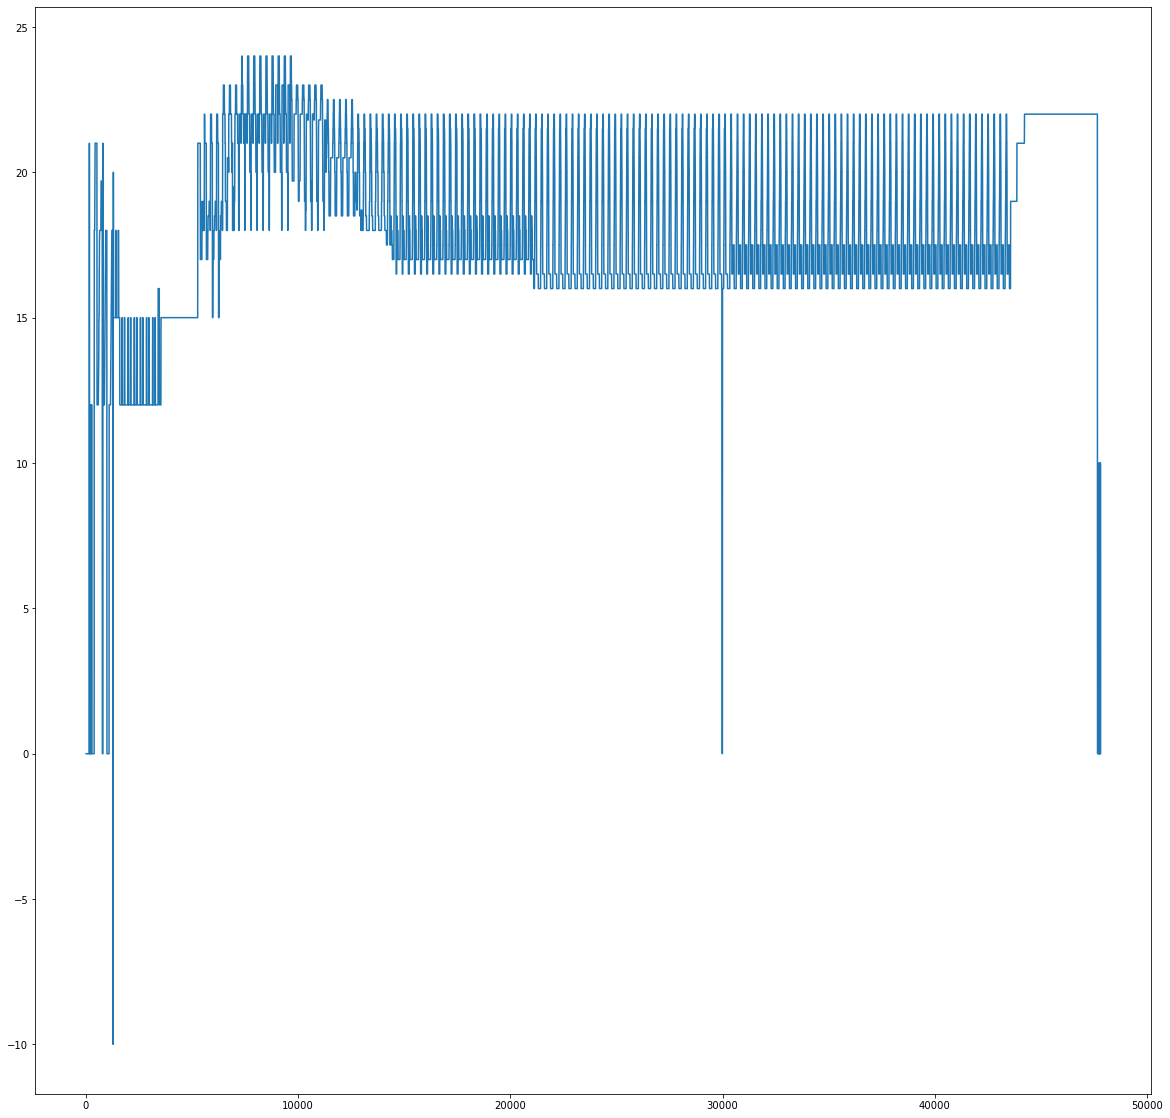

In [15]:
df_actions[0]["t_heat_sp"].plot(figsize=(20,20))

In [18]:
df_obs = []
for df_team in df_raw:
    df_obs.append(df_team.drop(["assim_sp","co2_sp","dx_sp","int_blue_sp","int_farred_sp", \
        "int_red_sp","int_white_sp","scr_blck_sp","scr_enrg_sp","t_grow_min_sp",\
        "t_heat_sp","t_rail_min_sp","t_vent_sp","water_sup_intervals_sp_min",\
        "window_pos_lee_sp","assim_vip","co2_vip","dx_vip","int_blue_vip","int_farred_vip", \
        "int_red_vip","int_white_vip","scr_blck_vip","scr_enrg_vip","t_grow_min_vip",\
        "t_heat_vip","t_rail_min_vip","water_sup_intervals_vip_min",\
        "window_pos_lee_vip",'t_ventlee_vip', 't_ventwind_vip'], axis=1))

In [19]:
df_obs[1].columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup'],
      dtype='object')

In [20]:
df_obs[1][['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup']].plot(figsize=(20,20))

<AxesSubplot:>

In [21]:
teams = ["Digilog","AICU","IUACAAS","Automatoes","TheAutomators"]
df_raw_rewards = []
df_teams  = []
i = 0
for i in range(len(teams)):
    df_tmp = pd.read_csv("datasets/{}/Production.csv".format(teams[i]))
    df_tmp=df_tmp.astype("float32")
    df_tmp=df_tmp.fillna(0)
    df_raw_rewards.append(df_tmp)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Digilog/Production.csv'

In [22]:
df_raw_rewards[1].columns

IndexError: list index out of range

In [23]:
df_obs[1]["%time"][47808]

43981.0

In [24]:
np.linspace(0,25,26)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [25]:
df_obs[1]

%time  AssimLight  BlackScr  CO2air    Cum_irr  EC_drain_PC  \
0      43815.000000       100.0      35.0   509.0  31.600000          0.3   
1      43815.003906       100.0      85.0   484.0  31.799999          0.3   
2      43815.007812       100.0      96.0   475.0  31.799999          0.3   
3      43815.011719       100.0      96.0   501.0  32.000000          0.3   
4      43815.015625       100.0      96.0   487.0  32.000000          0.3   
...             ...         ...       ...     ...        ...          ...   
47804  43980.984375         0.0       0.0   479.0   4.700000          6.8   
47805  43980.988281         0.0       0.0   485.0   4.700000          6.8   
47806  43980.992188         0.0       0.0   465.0   4.700000          6.8   
47807  43980.996094         0.0       0.0   470.0   4.700000          6.8   
47808  43981.000000         0.0       0.0     0.0   0.000000          0.0   

       EnScr  HumDef  PipeGrow    PipeLow      Rhair       Tair  Tot_PAR  \
0       96.0     8.8       0.0  49.900002  51.900002  21.000000      0.0   
1       96.0     9.2       0.0  48.500000  51.299999  21.500000      0.0   
2       96.0     9.1       0.0  46.799999  52.200001  21.600000      0.0   
3       96.0     8.5       0.0  45.200001  54.599998  21.299999      0.0   
4       96.0     8.5       0.0  43.799999  54.400002  21.400000      0.0   
...      ...     ...       ...        ...        ...        ...      ...   
47804    0.0     2.1       0.0   0.000000  86.099998  18.000000      0.0   
47805    0.0     2.1       0.0   0.000000  86.500000  17.900000      1.0   
47806    0.0     2.0       0.0   0.000000  86.900002  17.900000      0.0   
47807    0.0     1.9       0.0   0.000000  87.199997  17.900000      0.0   
47808    0.0     0.0       0.0   0.000000   0.000000   0.000000      0.0   

       Tot_PAR_Lamps  VentLee  Ventwind  co2_dos  pH_drain_PC  water_sup  
0                0.0      1.0       0.0   0.0000          6.5      263.0  
1                0.0      1.0       0.0   0.0001          6.5      265.0  
2                0.0      1.0       0.0   0.0000          6.5      265.0  
3                0.0      1.0       0.0   0.0028          6.5      267.0  
4                0.0      1.0       0.0   0.0022          6.5      267.0  
...              ...      ...       ...      ...          ...        ...  
47804            0.0      0.0       0.0   0.0003          3.3       39.0  
47805            0.0      0.0       0.0   0.0003          3.3       39.0  
47806            0.0      0.0       0.0   0.0003          3.3       39.0  
47807            0.0      0.0       0.0   0.0003          3.3       39.0  
47808            0.0      0.0       0.0   0.0000          0.0        0.0  

[47809 rows x 19 columns]

In [28]:
import pickle
with open('../observations.pickle', 'rb') as handle:
    obs = pickle.load(handle)

In [31]:
obs[0].iloc[1]

%time                       43815.003906
AssimLight                      0.000000
BlackScr                       85.000000
CO2air                        470.000000
Cum_irr                         0.300000
EC_drain_PC                     1.900000
EnScr                          96.000000
HumDef                          7.000000
PipeGrow                       55.900002
PipeLow                        57.500000
Rhair                          60.799999
Tair                           20.600000
Tot_PAR                         0.000000
Tot_PAR_Lamps                   0.000000
VentLee                         1.000000
Ventwind                        0.000000
co2_dos                         0.000500
pH_drain_PC                     7.300000
water_sup                       4.000000
ProdA                           0.050000
ProdB                           0.100000
avg_nr_harvested_trusses        0.100000
Truss development time         50.000000
Nr_fruits_ClassA                0.000000
Weight_fruits_Cl